In [1]:
# --- Importaciones iniciales ---
import sys, os, importlib
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "scripts")))

import funciones_comunes
import funciones_mongo
import funciones_neo4j
import config_paths

importlib.reload(funciones_comunes)
importlib.reload(funciones_mongo)
importlib.reload(funciones_neo4j)

from funciones_comunes import cargar_csv
from funciones_neo4j import insertar_varias_relaciones
from funciones_neo4j import mostrar_relaciones



✅ Índices creados o ya existentes.
✅ Índices creados o ya existentes.


# Carga de datos de Mongo

In [2]:
# --- Limpiar colecciones antes de volver a insertar, las reinicia ---
funciones_mongo.db.usuarios.delete_many({})
funciones_mongo.db.destinos.delete_many({})
funciones_mongo.db.hoteles.delete_many({})
funciones_mongo.db.actividades.delete_many({})
funciones_mongo.db.reservas.delete_many({})

# --- Cargar datos desde JSON ---
usuarios = funciones_comunes.cargar_json(config_paths.USUARIOS_JSON)
destinos = funciones_comunes.cargar_json(config_paths.DESTINOS_JSON)
hoteles = funciones_comunes.cargar_json(config_paths.HOTELES_JSON)
actividades = funciones_comunes.cargar_json(config_paths.ACTIVIDADES_JSON)
reservas = funciones_comunes.cargar_json(config_paths.RESERVAS_JSON)

# --- Insertar en MongoDB ---
funciones_mongo.insertar_varios_documentos("usuarios", usuarios)
funciones_mongo.insertar_varios_documentos("destinos", destinos)
funciones_mongo.insertar_varios_documentos("hoteles", hoteles)
funciones_mongo.insertar_varios_documentos("actividades", actividades)
funciones_mongo.insertar_varios_documentos("reservas", reservas)


In [3]:
# --- Verificar que se insertaron correctamente ---
print("\n🧍 Usuarios:")
for elem in funciones_mongo.db.usuarios.find():
    print(elem)

print("\n🌍 Destinos:")
for elem in funciones_mongo.db.destinos.find():
    print(elem)

print("\n🏨 Hoteles:")
for elem in funciones_mongo.db.hoteles.find():
    print(elem)

print("\n🎯 Actividades:")
for elem in funciones_mongo.db.actividades.find():
    print(elem)

print("\n📅 Reservas:")
for elem in funciones_mongo.db.reservas.find():
    print(elem)


🧍 Usuarios:
{'_id': ObjectId('68fd386a387b2f116b98a500'), 'usuario_id': 1, 'nombre': 'María Pérez', 'email': 'maria.perez@example.com', 'telefono': '+54 11 4567 1234'}
{'_id': ObjectId('68fd386a387b2f116b98a501'), 'usuario_id': 2, 'nombre': 'Juan López', 'email': 'juan.lopez@example.com', 'telefono': '+54 221 334 5566'}
{'_id': ObjectId('68fd386a387b2f116b98a502'), 'usuario_id': 3, 'nombre': 'Carla Gómez', 'email': 'carla.gomez@example.com', 'telefono': '+54 261 789 2233'}
{'_id': ObjectId('68fd386a387b2f116b98a503'), 'usuario_id': 4, 'nombre': 'Luis Fernández', 'email': 'luis.fernandez@example.com', 'telefono': '+54 299 444 9988'}
{'_id': ObjectId('68fd386a387b2f116b98a504'), 'usuario_id': 5, 'nombre': 'Ana Torres', 'email': 'ana.torres@example.com', 'telefono': '+54 381 123 4567'}

🌍 Destinos:
{'_id': ObjectId('68fd386a387b2f116b98a505'), 'destino_id': 1, 'ciudad': 'Bariloche', 'pais': 'Argentina', 'tipo': 'Montaña', 'precio_promedio': 90000}
{'_id': ObjectId('68fd386a387b2f116b98a5

# NEO4J

In [4]:
from funciones_neo4j import insertar_varios_nodos, insertar_varias_relaciones, mostrar_relaciones
import funciones_mongo
from funciones_comunes import cargar_csv  # si la usas para leer CSV

# === NODOS ===
usuarios = funciones_mongo.db.usuarios.find()
usuarios_formateados = [
    {"usuario_id": u["usuario_id"], "nombre": u["nombre"], "email": u["email"], "telefono": u["telefono"]}
    for u in usuarios
]
insertar_varios_nodos("Usuario", usuarios_formateados)

destinos = funciones_mongo.db.destinos.find()
destinos_formateados = [
    {"destino_id": d["destino_id"], "ciudad": d["ciudad"], "pais": d["pais"], "tipo": d["tipo"], "precio_promedio": d["precio_promedio"]}
    for d in destinos
]
insertar_varios_nodos("Destino", destinos_formateados)

# === RELACIONES ===
relaciones_sociales = cargar_csv("relaciones_sociales.csv")
rel_social_formateadas = [
    {
        "label_origen": "Usuario",
        "prop_origen": "usuario_id",
        "valor_origen": int(r["usuario1_id"]),
        "label_destino": "Usuario",
        "prop_destino": "usuario_id",
        "valor_destino": int(r["usuario2_id"]),
        "tipo": r["tipo"]
    }
    for r in relaciones_sociales
]

visitas = cargar_csv("visitas.csv")
rel_visitas_formateadas = [
    {
        "label_origen": "Usuario",
        "prop_origen": "usuario_id",
        "valor_origen": int(v["usuario_id"]),
        "label_destino": "Destino",
        "prop_destino": "destino_id",
        "valor_destino": int(v["destino_id"]),
        "tipo": "VISITO"
    }
    for v in visitas
]

# === INSERTAR RELACIONES ===
insertar_varias_relaciones(rel_social_formateadas)
insertar_varias_relaciones(rel_visitas_formateadas)

# === MOSTRAR RELACIONES ===
mostrar_relaciones()

✅ Se insertaron 5 nodos en 'Usuario'.
✅ Se insertaron 5 nodos en 'Destino'.
✅ Se insertaron 3 relaciones.
✅ Se insertaron 7 relaciones.

🔹 Relaciones sociales (Usuario ↔ Usuario):
  1 -[AMIGO_DE]-> 2
  2 -[AMIGO_DE]-> 1
  3 -[FAMILIAR_DE]-> 4

🔹 Relaciones de visitas (Usuario → Destino):
  1 -[VISITO]-> 1
  1 -[VISITO]-> 5
  2 -[VISITO]-> 1
  3 -[VISITO]-> 3
  4 -[VISITO]-> 2
  5 -[VISITO]-> 1
  5 -[VISITO]-> 4


# REDIS

In [5]:
# Importar la conexión a Redis desde tu módulo
from funciones_redis import r, flush_all

# Probar si Redis responde
print("Ping Redis:", r.ping())  # debería imprimir True

# Opcional: limpiar todas las claves (solo desarrollo)
flush_all()
print("Flush_all ejecutado correctamente")

Ping Redis: True
Flush_all ejecutado correctamente


In [6]:
import funciones_redis
importlib.reload(funciones_redis)

from funciones_redis import (
    push_recent_search, get_recent_searches,
    add_connected_user, remove_connected_user, get_connected_users,
    create_temp_reservation, get_temp_reservation, delete_temp_reservation,
    cache_query_result, get_cached_query, flush_all
)

In [7]:
# Borrar datos de Redis (solo desarrollo)
flush_all()

In [8]:
# --- EJEMPLO: Usuarios conectados ---
add_connected_user(1)
add_connected_user(2)
add_connected_user(3)

print("Usuarios conectados actualmente:", get_connected_users())

Usuarios conectados actualmente: ['3', '2', '1']


In [9]:
remove_connected_user(2)
print("Después de remover al usuario 2:", get_connected_users())

Después de remover al usuario 2: ['3', '1']


In [10]:
# --- EJEMPLO: Búsquedas recientes por usuario ---
push_recent_search(1, "Bariloche")
push_recent_search(1, "Mendoza")
push_recent_search(1, "Madrid")
push_recent_search(1, "Cancún")
push_recent_search(1, "Roma")
push_recent_search(1, "Ushuaia")  # esto empujará la más antigua fuera si max_items=5

print("Búsquedas recientes del usuario 1:", get_recent_searches(1))

Búsquedas recientes del usuario 1: ['Ushuaia', 'Roma', 'Cancún', 'Madrid', 'Mendoza']


In [11]:
# --- EJEMPLO: Reservas temporales ---
reserva_temp = {
    "reserva_id": 10,
    "usuario_id": 1,
    "destino_id": 2,
    "fecha_reserva": "2025-10-25",
    "estado": "Pendiente",
    "precio_total": 150000
}

In [12]:
create_temp_reservation(reserva_temp["reserva_id"], reserva_temp)
print("Reserva temporal recuperada:", get_temp_reservation(10))

delete_temp_reservation(10)
print("Después de eliminar:", get_temp_reservation(10))

# --- EJEMPLO: Cache de consultas ---
consulta_key = "usuarios_bariloche"
resultado = [{"usuario_id": 1, "nombre": "María Pérez"}, {"usuario_id": 2, "nombre": "Juan López"}]

cache_query_result(consulta_key, resultado, ttl_seconds=3600)
print("Cache recuperada:", get_cached_query(consulta_key))

Reserva temporal recuperada: {'reserva_id': 10, 'usuario_id': 1, 'destino_id': 2, 'fecha_reserva': '2025-10-25', 'estado': 'Pendiente', 'precio_total': 150000}
Después de eliminar: None
Cache recuperada: [{'usuario_id': 1, 'nombre': 'María Pérez'}, {'usuario_id': 2, 'nombre': 'Juan López'}]


# Consultas

1. Realizar una carga de datos inicial con:  
a. Usuarios  
b. Destinos  
c. Hoteles  
d. Actividades  
e. Reservas  
f. Caché de búsquedas  
g. Usuarios conectados  
h. Reservas temporales (aún no concretadas)  
i. Relaciones entre usuarios y destinos (ej: VISITÓ)  
j. Relaciones entre usuarios (ej: AMIGO_DE, FAMILIAR_DE).  

2. Implementar consultas integradas.   
a. Mostrar los usuarios que visitaron “Bariloche”.  
b. Mostrar los amigos de Juan que visitaron algún destino que visitó él, mostrar el nombre del Usuario y el destino.  
c. Sugerir destinos a un usuario que no haya visitado él ni sus amigos.    
d. Recomendar destinos basados en viajes de amigos.  
e. Listar los hoteles en los destinos recomendados del punto anterior.  
f. Ver las reservas en proceso, es decir que aún no están concretadas.  
g. Listar los usuarios conectados actualmente.  
h. Mostrar los destinos con precio inferior a $100.000.  
i. Mostrar todos los Hoteles de “Jujuy”.  
j. Mostrar la cantidad de hoteles de un destino que guste.  
k. Mostrar las actividades de “Ushuaia” del tipo “aventura”.  
l. Mostrar la cantidad de reservas concretadas de cada usuario. Mostrar el usuario y la cantidad  
m. Generar estadísticas:  
i. Destino más visitado.  
ii. Hotel más barato.  
iii. Actividad más popular.  
Agregar gráficos generados con python. Se adjunta código de ejemplo para generar un gráfico  

In [13]:
# A - Usuarios que visitaron Bariloche (Neo4j)
from funciones_neo4j import driver
query = """
MATCH (u:Usuario)-[:VISITO]->(d:Destino {ciudad: $ciudad})
RETURN u.usuario_id AS usuario_id, u.nombre AS nombre, d.ciudad AS destino
ORDER BY u.usuario_id
"""
with driver.session() as session:
    res = session.run(query, ciudad="Bariloche")
    resultados = [r.data() for r in res]
resultados

[{'usuario_id': 1, 'nombre': 'María Pérez', 'destino': 'Bariloche'},
 {'usuario_id': 2, 'nombre': 'Juan López', 'destino': 'Bariloche'},
 {'usuario_id': 5, 'nombre': 'Ana Torres', 'destino': 'Bariloche'}]

In [14]:
# B - Amigos de Juan que visitaron destinos que Juan visitó
usuario_objetivo = 2  # cambia si hace falta
query = """
MATCH (juan:Usuario {usuario_id: $uid})-[:VISITO]->(d:Destino)
MATCH (juan)-[:AMIGO_DE|:FAMILIAR_DE]-(amigo:Usuario)
MATCH (amigo)-[:VISITO]->(d)
RETURN DISTINCT amigo.usuario_id AS usuario_id, amigo.nombre AS nombre, d.ciudad AS destino
ORDER BY amigo.usuario_id, destino
"""
with driver.session() as session:
    res = session.run(query, uid=usuario_objetivo)
    amigos_comparten = [r.data() for r in res]
amigos_comparten

Received notification from DBMS server: <GqlStatusObject gql_status='01N01', status_description="warn: feature deprecated with replacement. ':AMIGO_DE|:FAMILIAR_DE' is deprecated. It is replaced by ':AMIGO_DE|FAMILIAR_DE'.", position=<SummaryInputPosition line=3, column=24, offset=87>, raw_classification='DEPRECATION', classification=<NotificationClassification.DEPRECATION: 'DEPRECATION'>, raw_severity='WARNING', severity=<NotificationSeverity.WARNING: 'WARNING'>, diagnostic_record={'_classification': 'DEPRECATION', '_severity': 'WARNING', '_position': {'offset': 87, 'line': 3, 'column': 24}, 'OPERATION': '', 'OPERATION_CODE': '0', 'CURRENT_SCHEMA': '/'}> for query: '\nMATCH (juan:Usuario {usuario_id: $uid})-[:VISITO]->(d:Destino)\nMATCH (juan)-[:AMIGO_DE|:FAMILIAR_DE]-(amigo:Usuario)\nMATCH (amigo)-[:VISITO]->(d)\nRETURN DISTINCT amigo.usuario_id AS usuario_id, amigo.nombre AS nombre, d.ciudad AS destino\nORDER BY amigo.usuario_id, destino\n'


[{'usuario_id': 1, 'nombre': 'María Pérez', 'destino': 'Bariloche'}]

In [15]:
# C - Sugerir destinos nuevos para un usuario (no visitados por él ni por sus amigos)
usuario_objetivo = 2

query = """
MATCH (d:Destino)
WHERE NOT EXISTS {
  MATCH (:Usuario {usuario_id: $uid})-[:VISITO]->(d)
}
AND NOT EXISTS {
  MATCH (:Usuario {usuario_id: $uid})-[:AMIGO_DE|:FAMILIAR_DE]-(f:Usuario)-[:VISITO]->(d)
}
RETURN d.destino_id AS destino_id, d.ciudad AS ciudad
ORDER BY d.ciudad
"""
with driver.session() as session:
    res = session.run(query, uid=usuario_objetivo)
    sugeridos = [r.data() for r in res]
sugeridos

Received notification from DBMS server: <GqlStatusObject gql_status='01N01', status_description="warn: feature deprecated with replacement. ':AMIGO_DE|:FAMILIAR_DE' is deprecated. It is replaced by ':AMIGO_DE|FAMILIAR_DE'.", position=<SummaryInputPosition line=7, column=49, offset=158>, raw_classification='DEPRECATION', classification=<NotificationClassification.DEPRECATION: 'DEPRECATION'>, raw_severity='WARNING', severity=<NotificationSeverity.WARNING: 'WARNING'>, diagnostic_record={'_classification': 'DEPRECATION', '_severity': 'WARNING', '_position': {'offset': 158, 'line': 7, 'column': 49}, 'OPERATION': '', 'OPERATION_CODE': '0', 'CURRENT_SCHEMA': '/'}> for query: '\nMATCH (d:Destino)\nWHERE NOT EXISTS {\n  MATCH (:Usuario {usuario_id: $uid})-[:VISITO]->(d)\n}\nAND NOT EXISTS {\n  MATCH (:Usuario {usuario_id: $uid})-[:AMIGO_DE|:FAMILIAR_DE]-(f:Usuario)-[:VISITO]->(d)\n}\nRETURN d.destino_id AS destino_id, d.ciudad AS ciudad\nORDER BY d.ciudad\n'


[{'destino_id': 2, 'ciudad': 'Cancún'},
 {'destino_id': 3, 'ciudad': 'Madrid'},
 {'destino_id': 4, 'ciudad': 'Roma'}]

In [16]:
# D - Recomendaciones por frecuencia entre amigos
usuario_objetivo = 2
top_n = 5
query = """
MATCH (:Usuario {usuario_id: $uid})-[:AMIGO_DE|:FAMILIAR_DE]-(f:Usuario)-[:VISITO]->(d:Destino)
WHERE NOT EXISTS((:Usuario {usuario_id: $uid})-[:VISITO]->(d))
RETURN d.ciudad AS ciudad, d.destino_id AS destino_id, count(*) AS visitas_amigos
ORDER BY visitas_amigos DESC
LIMIT $n
"""
with driver.session() as session:
    res = session.run(query, uid=usuario_objetivo, n=top_n)
    recomendaciones = [r.data() for r in res]
recomendaciones

Received notification from DBMS server: <GqlStatusObject gql_status='01N01', status_description="warn: feature deprecated with replacement. ':AMIGO_DE|:FAMILIAR_DE' is deprecated. It is replaced by ':AMIGO_DE|FAMILIAR_DE'.", position=<SummaryInputPosition line=2, column=47, offset=47>, raw_classification='DEPRECATION', classification=<NotificationClassification.DEPRECATION: 'DEPRECATION'>, raw_severity='WARNING', severity=<NotificationSeverity.WARNING: 'WARNING'>, diagnostic_record={'_classification': 'DEPRECATION', '_severity': 'WARNING', '_position': {'offset': 47, 'line': 2, 'column': 47}, 'OPERATION': '', 'OPERATION_CODE': '0', 'CURRENT_SCHEMA': '/'}> for query: '\nMATCH (:Usuario {usuario_id: $uid})-[:AMIGO_DE|:FAMILIAR_DE]-(f:Usuario)-[:VISITO]->(d:Destino)\nWHERE NOT EXISTS((:Usuario {usuario_id: $uid})-[:VISITO]->(d))\nRETURN d.ciudad AS ciudad, d.destino_id AS destino_id, count(*) AS visitas_amigos\nORDER BY visitas_amigos DESC\nLIMIT $n\n'


[{'ciudad': 'Mendoza', 'destino_id': 5, 'visitas_amigos': 2}]

In [17]:
# E - Hoteles en destinos recomendados (usa resultado D)
ciudades_reco = [r["ciudad"] for r in recomendaciones]  # resultado de la celda anterior
if not ciudades_reco:
    print("No hay recomendaciones previas.")
else:
    import funciones_mongo
    hoteles_reco = list(funciones_mongo.db.hoteles.find({"ciudad": {"$in": ciudades_reco}}))
    hoteles_reco

In [18]:
# F - Reservas en proceso (Pendiente, u otros estados no Confirmada)
import funciones_mongo
cursor = funciones_mongo.db.reservas.find({"estado": {"$ne": "Confirmada"}})
list(cursor)
# Si preferís solo 'Pendiente':
# list(funciones_mongo.db.reservas.find({"estado":"Pendiente"}))

[{'_id': ObjectId('68fd386a387b2f116b98a517'),
  'reserva_id': 2,
  'usuario_id': 2,
  'destino_id': 1,
  'fecha_reserva': '2025-06-15',
  'estado': 'Pagada',
  'precio_total': 90000},
 {'_id': ObjectId('68fd386a387b2f116b98a518'),
  'reserva_id': 3,
  'usuario_id': 3,
  'destino_id': 3,
  'fecha_reserva': '2025-05-20',
  'estado': 'Cancelada',
  'precio_total': 110000},
 {'_id': ObjectId('68fd386a387b2f116b98a519'),
  'reserva_id': 4,
  'usuario_id': 1,
  'destino_id': 4,
  'fecha_reserva': '2025-07-10',
  'estado': 'Pendiente',
  'precio_total': 100000}]

In [19]:
# G - Usuarios conectados desde Redis
import funciones_redis
usuarios_conectados = funciones_redis.get_connected_users()
usuarios_conectados

from funciones_mongo import db
ids = [int(x) for x in usuarios_conectados]
usuarios_docs = list(db.usuarios.find({"usuario_id": {"$in": ids}}, {"_id":0,"usuario_id":1,"nombre":1}))
usuarios_docs

[{'usuario_id': 1, 'nombre': 'María Pérez'},
 {'usuario_id': 3, 'nombre': 'Carla Gómez'}]

In [20]:
# H - Destinos con precio_promedio < 100000
import funciones_mongo
destinos_baratos = list(funciones_mongo.db.destinos.find({"precio_promedio": {"$lt": 100000}}))
destinos_baratos

[{'_id': ObjectId('68fd386a387b2f116b98a505'),
  'destino_id': 1,
  'ciudad': 'Bariloche',
  'pais': 'Argentina',
  'tipo': 'Montaña',
  'precio_promedio': 90000},
 {'_id': ObjectId('68fd386a387b2f116b98a509'),
  'destino_id': 5,
  'ciudad': 'Mendoza',
  'pais': 'Argentina',
  'tipo': 'Vinos',
  'precio_promedio': 80000}]

In [21]:
# I - Hoteles en Jujuy
hoteles_jujuy = list(funciones_mongo.db.hoteles.find({"ciudad": "Jujuy"}))
hoteles_jujuy

[{'_id': ObjectId('68fd386a387b2f116b98a50c'),
  'hotel_id': 3,
  'nombre': 'Altos del Norte',
  'ciudad': 'Jujuy',
  'precio': 60000,
  'calificacion': 3,
  'servicios': ['wifi']}]

In [22]:
# J - Cantidad de hoteles por ciudad
def contar_hoteles_por_ciudad(ciudad):
    import funciones_mongo
    return funciones_mongo.db.hoteles.count_documents({"ciudad": ciudad})

# Ejemplo:
contar_hoteles_por_ciudad("Bariloche")

2

In [23]:
# K - Actividades en Ushuaia de tipo 'aventura'
actividades_ushuaia = list(funciones_mongo.db.actividades.find({"ciudad":"Ushuaia", "tipo":"aventura"}))
actividades_ushuaia

[]

In [24]:
# L - Cantidad de reservas Confirmadas por usuario
import funciones_mongo
pipeline = [
    {"$match": {"estado": "Confirmada"}},
    {"$group": {"_id": "$usuario_id", "cantidad": {"$sum": 1}}},
    {"$sort": {"cantidad": -1}}
]
stats = list(funciones_mongo.db.reservas.aggregate(pipeline))
# Enriquecer con nombres
for s in stats:
    user = funciones_mongo.db.usuarios.find_one({"usuario_id": s["_id"]}, {"nombre":1})
    s["nombre"] = user["nombre"] if user else None
stats

[{'_id': 1, 'cantidad': 1, 'nombre': 'María Pérez'},
 {'_id': 5, 'cantidad': 1, 'nombre': 'Ana Torres'}]

,ciudad,visitas
0,Bariloche,3
1,Mendoza,1
2,Madrid,1
3,Cancún,1
4,Roma,1


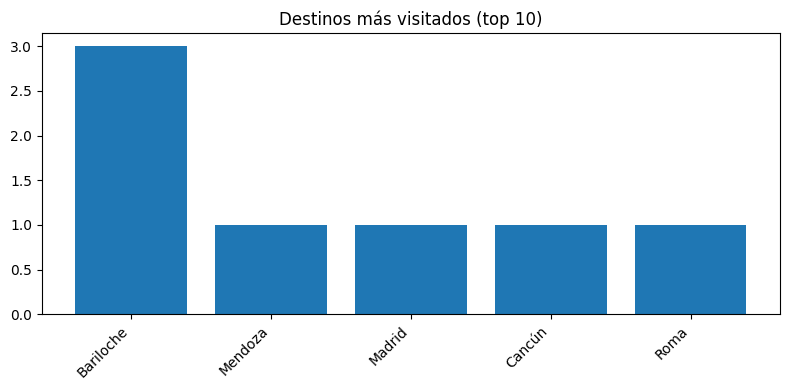

In [25]:
# M.i - Destino más visitado (Neo4j) y gráfico
from funciones_neo4j import driver
import pandas as pd
import matplotlib.pyplot as plt

query = """
MATCH (:Usuario)-[:VISITO]->(d:Destino)
RETURN d.ciudad AS ciudad, count(*) AS visitas
ORDER BY visitas DESC
"""
with driver.session() as session:
    rows = session.run(query)
    df = pd.DataFrame([r.data() for r in rows])

if df.empty:
    print("No hay datos de visitas.")
else:
    display(df.head())
    # Gráfico de barras top 10
    df_top = df.head(10)
    plt.figure(figsize=(8,4))
    plt.bar(df_top['ciudad'], df_top['visitas'])
    plt.xticks(rotation=45, ha='right')
    plt.title("Destinos más visitados (top 10)")
    plt.tight_layout()
    plt.show()

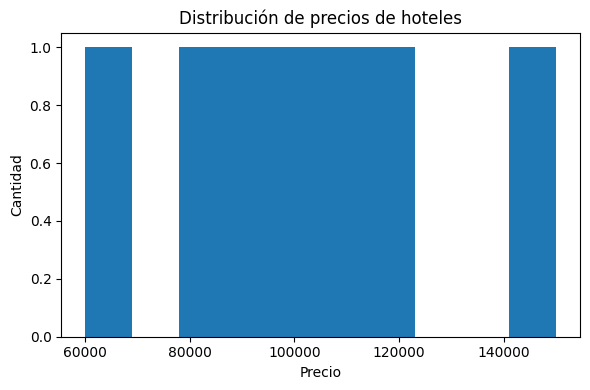

In [26]:
# M.ii - Hotel más barato
import funciones_mongo
hotel_barato = funciones_mongo.db.hoteles.find_one({}, sort=[("precio", 1)])
hotel_barato

# Histograma de precios de hoteles
import matplotlib.pyplot as plt
precios = [h["precio"] for h in funciones_mongo.db.hoteles.find() if "precio" in h]
plt.figure(figsize=(6,4))
plt.hist(precios, bins=10)
plt.title("Distribución de precios de hoteles")
plt.xlabel("Precio")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

In [27]:
# M.iii - Buscar actividad en reservas
sample_res = funciones_mongo.db.reservas.find_one({"actividad_id": {"$exists": True}})
sample_res

In [28]:
pipeline = [
    {"$match": {"actividad_id": {"$exists": True}}},
    {"$group": {"_id": "$actividad_id", "count": {"$sum": 1}}},
    {"$sort": {"count": -1}},
    {"$limit": 1}
]
most = list(funciones_mongo.db.reservas.aggregate(pipeline))
most
# Para obtener el nombre descriptivo:
if most:
    actividad_id = most[0]["_id"]
    actividad_doc = funciones_mongo.db.actividades.find_one({"actividad_id": actividad_id})
    actividad_doc